In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#reading data
#https://www.kaggle.com/jemishdonda/headbrain/download
#data = pd.read_csv('https://www.kaggle.com/jemishdonda/headbrain/download/headbrain.csv"')
#print(data.shape)
#data.head()

url = "https://raw.githubusercontent.com/mubaris/potential-enigma/master/headbrain.csv"
#names = ['Gender', 'Age-Range', 'Head-Size(cm^3)', 'Brain-Weight(grams)']
data = pd.read_csv(url)
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
#collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [12]:
# mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m = len(X)

#USing the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer +=(X[i] - mean_x) * (Y[i] - mean_y)
    denom  +=(X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#Print coefficient
#values of m and c in y = mx+c
print(b1, b0)

0.26342933948939945 325.57342104944223


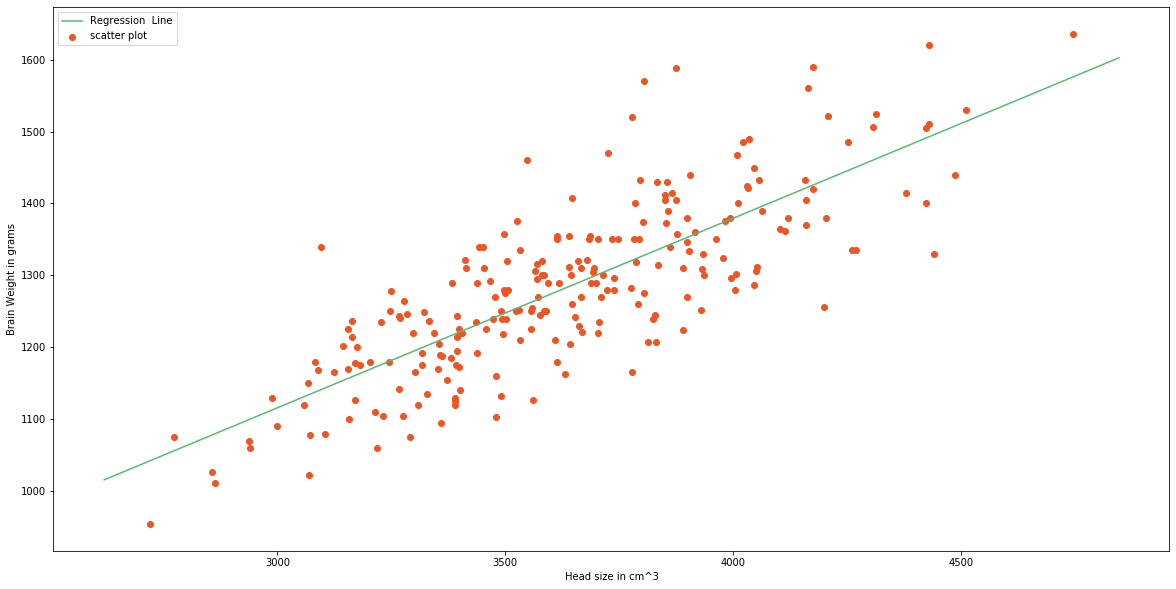

In [14]:
#plotting values and reggression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#plotting line
plt.plot(x, y, color = "#58b970", label ="Regression  Line")
#plotting scatter pointer
plt.scatter(X, Y, c="#ef5423", label = "scatter plot")

plt.xlabel('Head size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()


In [16]:
#how good the model is
# using r^2
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 +b1 *X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
# total sum of square / total sum of residual
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [20]:
#using scikit library 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank 1 matric in scikit learn
X = X.reshape((m, 1))
#creating model
reg = LinearRegression()
#fitting training data
reg = reg.fit(X, Y)
# Y prediction
Y_pred = reg.predict(X)
#calculating R2 square
r2_score = reg.score(X, Y)
print(r2_score)

0.639311719957
